# Palmer Penguin Project

***

This notebook contains my analysis of famous palmer penguin’s dataset. This repository focuses on the body mass of the penguin as the main parameter.

![image palmer penguins](https://www.gabemednick.com/post/penguin/featured_hu23a2ff6767279debab043a6c8f0a6157_878472_720x0_resize_lanczos_2.png)

Data is available on [GITHUB](https://allisonhorst.github.io/palmerpenguins/)


## Technical

This section covers all the technical needs to run the code on this repository. It is split in 2 areas:

*   Modules - Pandas, matplotlib and NumPy are needed for this project
*   Palmer Penguins Dataset


#### Import modules

In [1]:

# Data frames
import pandas as pd
# Plotting
import matplotlib.pyplot as plt
# Numerical arrays
import numpy as np

#### Upload dataset

In [2]:
# Using pd.reader_csv in python we can upload the data set. Our function is called df.

df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Remove NAN is critical step. In future steps like calculation of the correlation we cannot have NAN in the data set. Otherwise, it won't get calculated.

df= df.dropna()

#Reference number 1

## Overview 

This section is divided in 3 areas:
*   Quick overview of data by calling the function
*   Data summary with basic statistics parameters
*   Type of data available in the dataset

In [3]:
# We use name funcion  to have a quick look of the Palmer Penguins dataset
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### Data Summary


In [4]:
#Summarize the main statistics

df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


### Types

There is 2 different types of data in the datset.

Firstly, we have floats. Floats are any number with a decimal point. Almost all platforms represent Python float values as 64-bit “double-precision” values, according to the IEEE 754 standard. Floating point numbers are represented in computer hardware as binary (base-2) fractions. Most decimal fractions cannot be represented exactly as binary fractions, so in most cases the internal representation of a floating-point number is an approximation of the actual value. For example if we divide 1/5 , no matter how many digits you’re willing to write down, the result will never be exactly  but will be an increasingly better approximation of 1/5.

Object/String = The data type for Series and Data Frame columns containing strings is object. IN this case the objects are equivalent to strings. In python strings are a series of characters.


**References for this section can be found in reference under numbers 5,6,7,8**


In [5]:
# This functions allow us to se the type of data which is contained in the dataset. 
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

## Visualization

This section will contain different analysis and graphs that will help to understand the influence of the body mass int the palmer penguin’s colony.

*   First thing we need to create arrays with NumPy
*   Composition of the colony - represented by a bar, pie, scatter charts and histogram
    *   Bar chart named **Number of penguins per specie**. 
    *   Pie chart named **Percentage of penguins per species**. 
    *   Bar and scatter chart named **Average penguin body mass by species**. 
    *   Histogram chart called **Number of Penguins per body mass**

*   Project - Creating subplots and calculating correlation. Chart called **Body mass Vs Flipper Length**





In [6]:
# Creating array using numpy.
 
bill_length = df["bill_length_mm"].to_numpy()
bill_depth = df["bill_depth_mm"].to_numpy()
flipper_length = df["flipper_length_mm"].to_numpy()
body_mass = df["body_mass_g"].to_numpy()


### Composition of the colony

This section aims to analyse the composition of the Palmer Penguins colony based in species and the body weight. The section contains 3 charts.

The first bar chart called **Number of penguins per species** provide a clear view of the composition of the colony by type of species. The pie chart called **Percentage of penguins per species** shows the percentage of each penguin species in the colony.

Secondly, the graph called **Average penguin body mass by species** is a combination of a bar and scatter chart. In this chart we can clearly see that Gentoo Penguins have a bigger size comparing with the other species.

Finally, we have a histogram which show the number of penguins per body mass. In this chart we can see that majority of penguins are concentrated around body mass of between 3200 and 4700. comparing with  information from previous charts we can see that majority of penguins that falls within this range are form Adelie or Chinstrap species.


Text(0.5, 1.0, 'Number of Penguins per Specie')

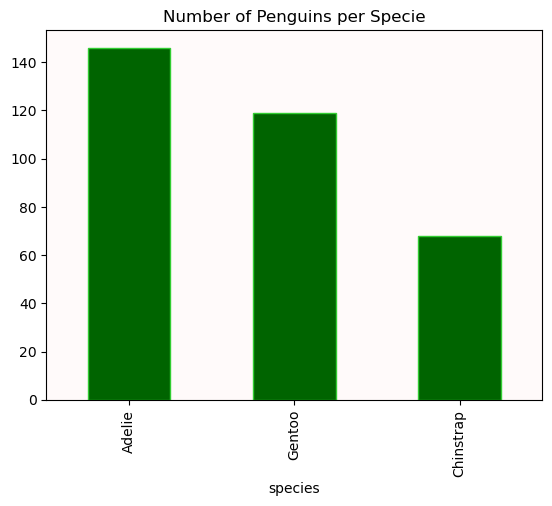

In [7]:
# This bar chart was created using the parameter species. Species is a data type object (string), and it cannot be directly used to create the bar chart. Adding value count allow the system to create the bar chart.

number_of_penguins =df ["species"].value_counts().plot.bar(color="darkgreen",edgecolor="limegreen")
number_of_penguins.set_facecolor("snow")
plt.title("Number of Penguins per Specie")

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

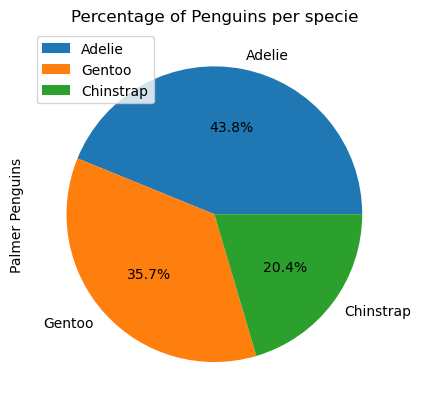

In [8]:
#Adding Value count to species allow to convert species (object) in numbers and that’s allow the matplotlib to create the pie chart

df ["species"].value_counts().plot.pie(autopct='%1.1f%%')
plt.legend(loc="upper left")
plt.ylabel("Palmer Penguins")
plt.title("Percentage of Penguins per specie")

# This function shows the total number of penguins per specie
df ["species"].value_counts()

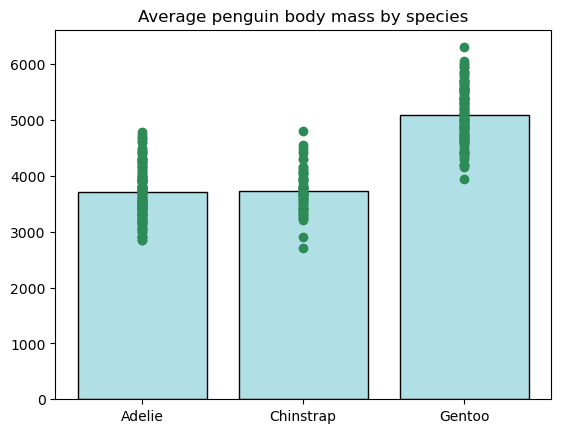

In [9]:
# The bar chart used  2 parameters. Species and body mass. Using groupby we can create groups of penguins and the mean give us teh average body mass. 
penguins_grouped = df[['species', 'body_mass_g']].groupby('species').mean().reset_index()

plt.bar(penguins_grouped['species'], penguins_grouped['body_mass_g'], color="powderblue",edgecolor="black")
plt.title('Average penguin body mass by species')

# Adding the scatter plot shows us the range of body mass of each of the species. 
plt.scatter(df ["species"], df[ "body_mass_g"], color = "seagreen")

# Reference 2.

Text(0.5, 1.0, 'Number of penguis per body mass ')

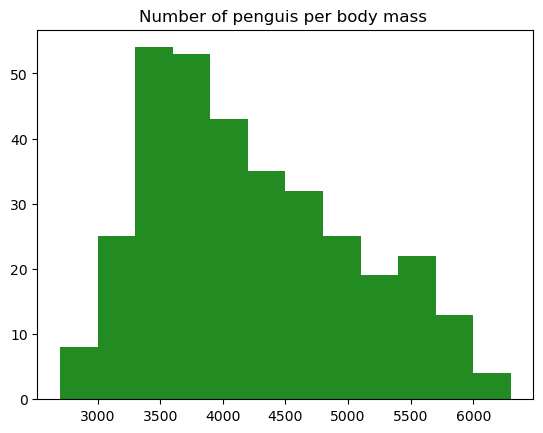

In [17]:
# The histagram shows the number of penguins by body mass. We can see that the majority of penguins falls between apporx 3200 and 4700. 
plt.hist(body_mass, bins= 12, color = "forestgreen")

plt.title("Number of penguis per body mass ")

### Project - body mass Vs Flipper Length

In the last section of this repository, we can see a new chart that combines Body mass and flipper length using subplot. Moreover, I have added the best fit lane and calculated the correlation.
For this project it was critical to remove NAN from the Palmer Penguins dataset. Otherwise, it wouldn't have worked.

For the creation of best fit line, we use below formula:

$ y = mx +c = p_1 x^1 + p_0 = p_1 x + p_0$

As we can see the correlation between both parameters are very high reaching 0.872. This is considered a very strong correlation (more than 0.75 is considered a strong correlation). This means that there is evidence that support that when body mass grows the size of the flipper length grows too.


In [11]:
# We use polyfit from NumPy to create the best fit line. In our case we use body mass and flipper length as parameters

m, c = np.polyfit(body_mass,flipper_length,1)
m,c

(0.01519526481521767, 137.0396208922547)

Text(0, 0.5, 'Flipper Length mm')

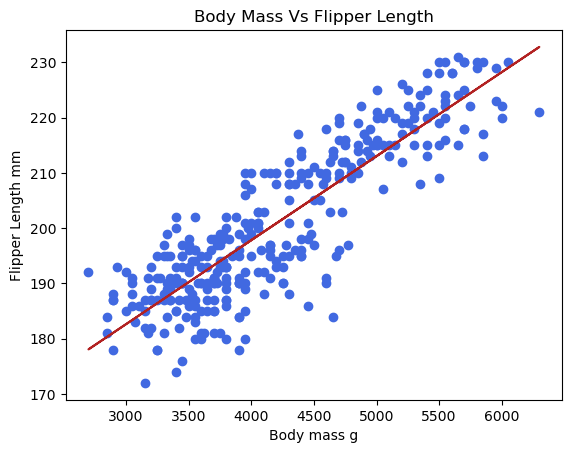

In [31]:
#Create a new plot using subplots

fig, ax = plt.subplots()

#Siple plot

ax.plot(body_mass,flipper_length,"o", color = "royalblue")

#Siple plot
ax.plot(body_mass, m * body_mass + c,"firebrick")


ax.set_title("Body Mass Vs Flipper Length")

ax.set_xlabel("Body mass g")

ax.set_ylabel("Flipper Length mm")




In [ ]:
# We use Numpy corrcoef to measure the correlation.
np.corrcoef(body_mass,flipper_length)

# Reference 9


array([[1.       , 0.8729789],
       [0.8729789, 1.       ]])

## References
1. https://www.geeksforgeeks.org/how-to-drop-rows-with-nan-values-in-pandas-dataframe/
2. www.datacamp.com / https://www.datacamp.com/tutorial/types-of-data-plots-and-how-to-create-them-in-python
3. https://www.w3schools.com/python/
4. https://stackoverflow.com/
5. https://note.nkmk.me/en/python-pandas-dtype-astype/#:~:text=The%20object%20type%20is%20a,elements%20need%20to%20be%20strings.
6. https://docs.python.org/3.6/tutorial/floatingpoint.html
7. https://realpython.com/python-data-types/
8. Python crash curse 3 edition by Eric Matthews 2023
9. https://www.statology.org/what-is-a-strong-correlation/

***

### END